Kiper22- zadanie zaliczeniowe nr 2

## 1 Analiza zbioru danych

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


**df['pclass'] df['survived']** - wszystko pełne i poprawne wartości

In [5]:
print(df['pclass'].unique())
print(df['survived'].unique())

[1 2 3]
[1 0]


**df['name']** - zostanie wyciągnięty tytuł osób (miss, mr...), a kolumna *name* będzie do usunięcia

In [6]:
print(df['name'].nunique())
df['name'].iloc[0:5]

1307


0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

**df['sex'] df['age']** - kolumna płci nie wymaga popraw, jednakże kolumna wieku zawiera ułamki. W kolumnie *age* około 20% to puste wartości - będą uzupełnione we fragmencie '*2 Feature Engineering'*

In [7]:
print(df['sex'].unique())
print(df['age'].unique())
print(df['age'].isna().sum())

['female' 'male']
[29.      0.9167  2.     30.     25.     48.     63.     39.     53.
 71.     47.     18.     24.     26.     80.         nan 50.     32.
 36.     37.     42.     19.     35.     28.     45.     40.     58.
 22.     41.     44.     59.     60.     33.     17.     11.     14.
 49.     76.     46.     27.     64.     55.     70.     38.     51.
 31.      4.     54.     23.     43.     52.     16.     32.5    21.
 15.     65.     28.5    45.5    56.     13.     61.     34.      6.
 57.     62.     67.      1.     12.     20.      0.8333  8.      0.6667
  7.      3.     36.5    18.5     5.     66.      9.      0.75   70.5
 22.5     0.3333  0.1667 40.5    10.     23.5    34.5    20.5    30.5
 55.5    38.5    14.5    24.5    60.5    74.      0.4167 11.5    26.5   ]
263


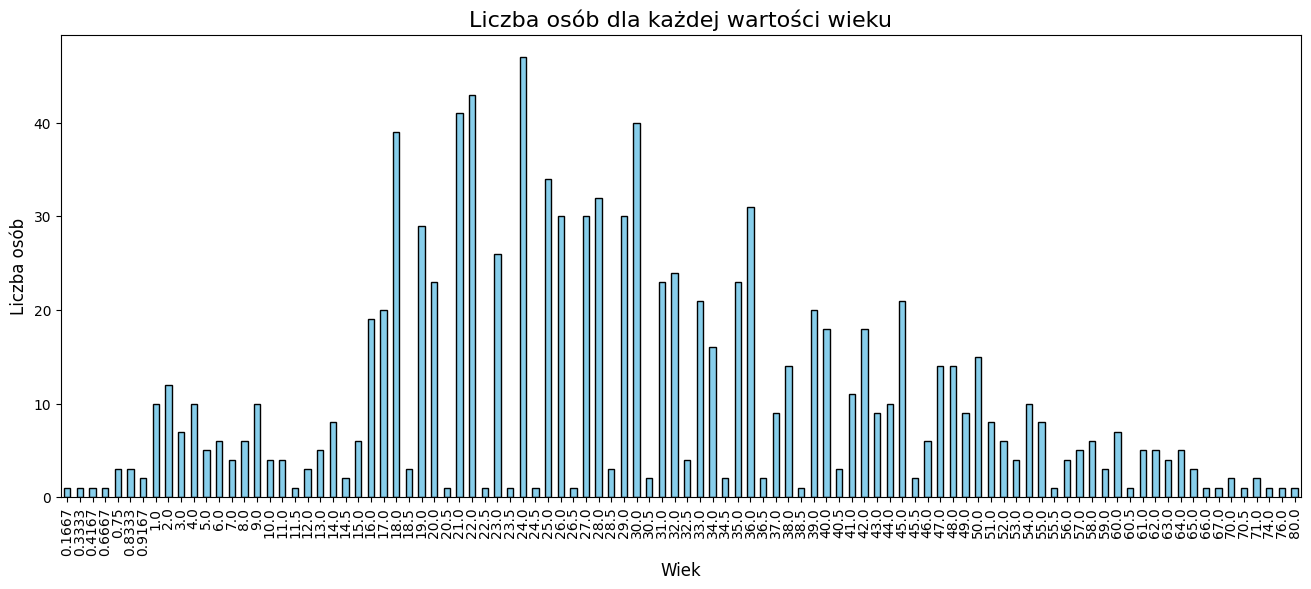

In [8]:
age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(16, 6)) 
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Liczba osób dla każdej wartości wieku', fontsize=16)
plt.xlabel('Wiek', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)

plt.show()

**df['sibsp'] df['parch']** - kolumny wydają się poprawne

In [9]:
print(df['sibsp'].unique())
print(df['parch'].unique())

[0 1 2 3 4 5 8]
[0 2 1 4 3 5 6 9]


**df['ticket']** - posiada wiele unikalnych wartości. Kolumna zostanie usunięta, ponieważ nie widzę możliwości uzyskania z tej kolumny jakichkolwiek danych

In [10]:
print(df['ticket'].nunique())

929


**df['fare']** - jest jeden pusty element oraz wartości odstające. Będzie zastosowane ogarniczenie wartości maksymalnej i uzupełnienie brakującej wartości w następnym rozdziale notatnika

In [11]:
df.loc[df['fare'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


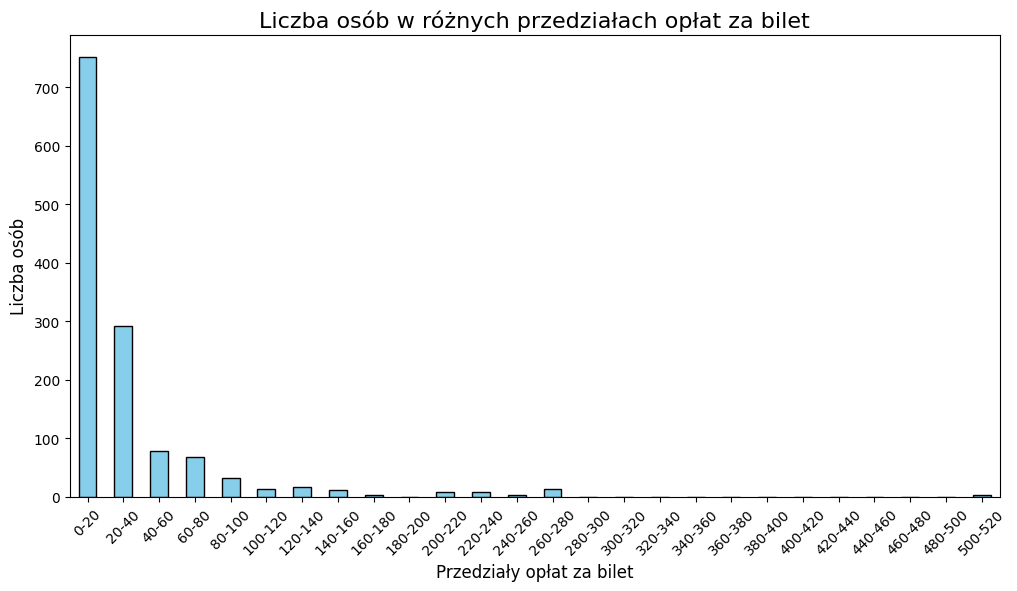

In [12]:
fare_bins = range(0, int(df['fare'].max()) + 20, 20)

fare_labels = [f"{i}-{i+20}" for i in fare_bins[:-1]]

fare_counts = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels, right=False).value_counts().sort_index()

plt.figure(figsize=(12, 6))  
fare_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Liczba osób w różnych przedziałach opłat za bilet', fontsize=16)
plt.xlabel('Przedziały opłat za bilet', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)
plt.xticks(rotation=45)  
plt.show()

**df['cabin']** - pomimo, że można uzyskać informacje o segmencie (co mogło przekładać się na liczbę osób przypadajacych na łodź ratunkową) danych jest znacznie za mało. Kolumna zostanie usunięta

In [13]:
print(df['cabin'].unique())
print(df['cabin'].isna().value_counts())

['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3' 'A24'
 'A32' 'A11' 'A10' 'B57 B59 B63 B66' 'C28' 'E44' 'A26' 'A6' 'A7' 'C31'
 'A19' 'B45' 'E34' 'B78' 'B50' 'C87' 'C116' 'C55 C57' 'D50'

**df['embarked']** - brakuje dwóch wartości. Dane zostaną uzupełnione w kolejnym rozdziale

In [14]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [15]:
df.groupby('embarked').size()

embarked
C    270
Q    123
S    914
dtype: int64

In [16]:
df.loc[df['embarked'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


**df['home_dest']** - ze względu na ponad połowę pustych wartości kolumna jest nieprzydatna. Zostanie ona usunięta we fragmencie '*2 Feature Engineering*'

In [17]:
df['home_dest'].isna().value_counts()

home_dest
False    745
True     564
Name: count, dtype: int64

In [18]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home_dest'],
      dtype='object')

Tutaj można podjerzeć zależności poszczególnych atrybutów i ich wartości, a przeżywalnością. Na funkcji można grupować dane, działa dla zmiennych kategorycznych oraz numerycznych.

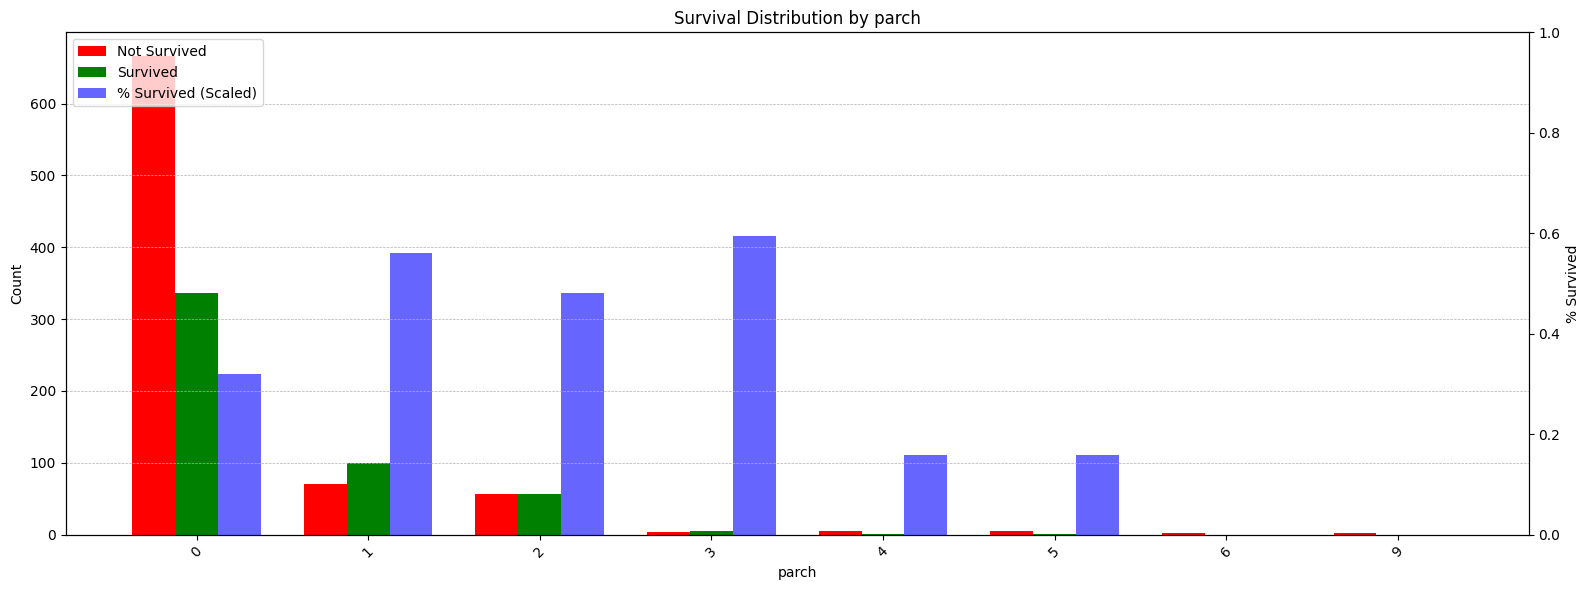

In [19]:
def plot_survival_distribution(df, column, bin_size=None):
    new_df = df.copy()
    if pd.api.types.is_numeric_dtype(new_df[column]) and bin_size is not None:
        new_df['grouped'] = pd.cut(new_df[column], bins=np.arange(new_df[column].min(), new_df[column].max() + bin_size, bin_size))
        grouped_data = new_df.groupby('grouped')['survived'].value_counts().unstack(fill_value=0)
    else:
        grouped_data = new_df.groupby(column)['survived'].value_counts().unstack(fill_value=0)
    
    grouped_data.columns = ['False', 'True']
    grouped_data['% Survived'] = grouped_data['True'] / (grouped_data['True'] + grouped_data['False'])
    
    x = np.arange(len(grouped_data))
    bar_width = 0.25
    
    fig, ax1 = plt.subplots(figsize=(16, 6))

    ax1.bar(x - bar_width, grouped_data['False'], width=bar_width, color='red', label='Not Survived')
    ax1.bar(x, grouped_data['True'], width=bar_width, color='green', label='Survived')
    ax1.bar(x + bar_width, grouped_data['% Survived'] * grouped_data[['False', 'True']].max().max(),
            width=bar_width, color='blue', alpha=0.6, label='% Survived (Scaled)')
    
    ax1.set_ylabel('Count')
    ax1.set_xlabel(column)
    ax1.set_title(f'Survival Distribution by {column}')
    ax1.set_xticks(x)
    ax1.set_xticklabels(grouped_data.index.astype(str), rotation=45)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.set_ylabel('% Survived')
    ax2.set_ylim(0, 1)

    ax1.grid(visible=True, linestyle='--', linewidth=0.5, axis='y')

    plt.tight_layout()
    plt.show()

plot_survival_distribution(df, column='parch')

## 2 Feature engineering, uzupełnianie i przycięcie brakujących wartości

Tutaj odbędzie się transformacja danych. Usunięte będą kolumny, co do których mamy pewność o ich nieprzydatności. Część danych będzie pogrupowana oraz będą przycinane wartości.

Wyciągnięcie tytułów z kolumny *name*

In [20]:
df['title'] = df['name'].str.extract(r',\s*(\w+)\.')
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', nan, 'Don', 'Rev', 'Ms'],
      dtype=object)

In [21]:
df.loc[df['title'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,title
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,8,NaN,"London Vancouver, BC",NaN


*Countness* jest odpowiednikiem *Lady* (w tradycji brytyjskiej nadawany żonie hrabiego)

In [22]:
df.loc[245, 'title'] = 'Lady'

In [23]:
df['title'].value_counts()

title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Lady          2
Mlle          2
Ms            2
Major         2
Sir           1
Dona          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Name: count, dtype: int64

Cieżko jest uznać tutuły takie jak Rev czy Dr za reprezentatywne. Jest zaledwie 34 z ponad 1300 osób z tytułami, których jest poniżej 10. Wartości zostaną zgrupowane do 4 głównych kategorii- dwóch damskich oraz dwóch męskich

In [24]:
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Dona': 'Mrs',
    'Lady': 'Mrs',
    'Sir': 'Mr',
    'Don': 'Mr',
    'Jonkheer': 'Mr',
    'Capt': 'Mr',
    'Col': 'Mr',
    'Major': 'Mr',
    'Rev': 'Mr',
    'Dr': 'Mr'
}

df['title'] = df['title'].map(title_mapping)

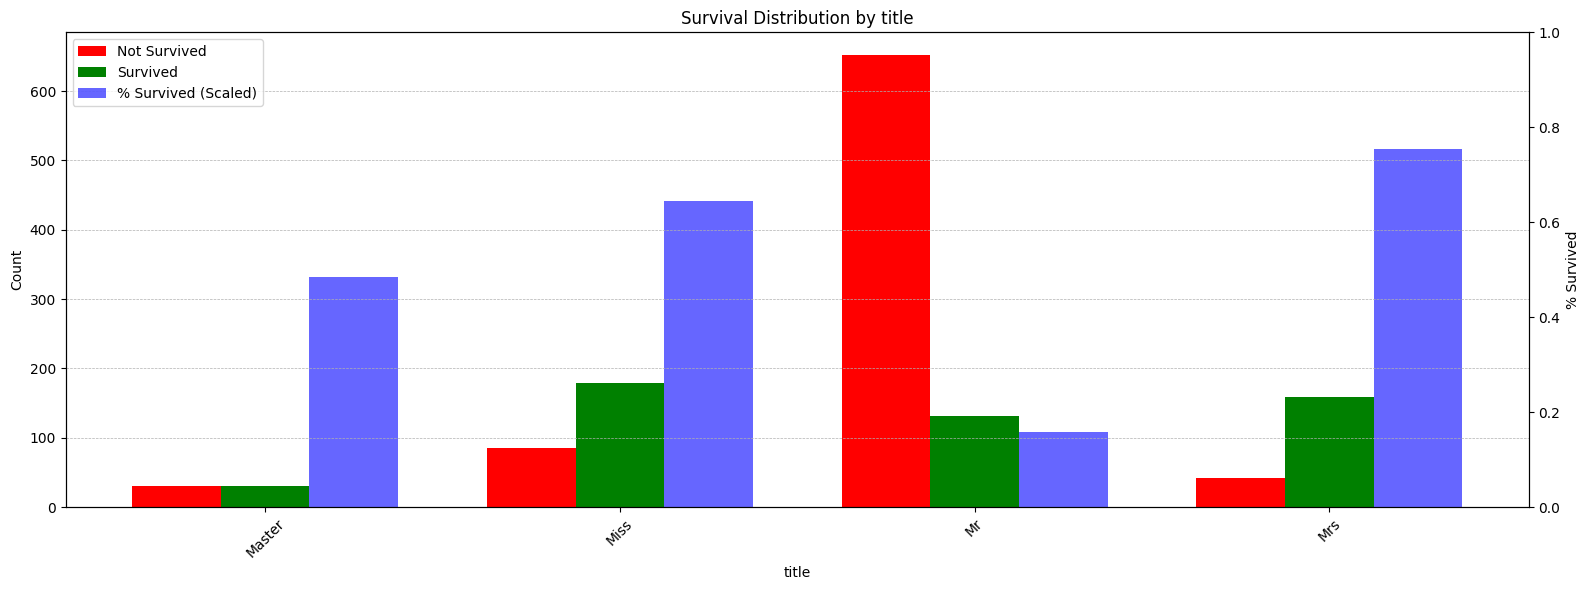

In [25]:
plot_survival_distribution(df, column='title')

Uzupełnienie wieku oraz jego przycięcie

In [26]:
def round_up_age(age):
    if 0 <= age <= 80:
        return np.ceil(age).astype(int)  
    return age


df['age'] = df.groupby('title')['age'].transform(lambda x: x.fillna(x.median()))
df['age'] = df['age'].apply(lambda x: round_up_age(x) if pd.notna(x) else x)

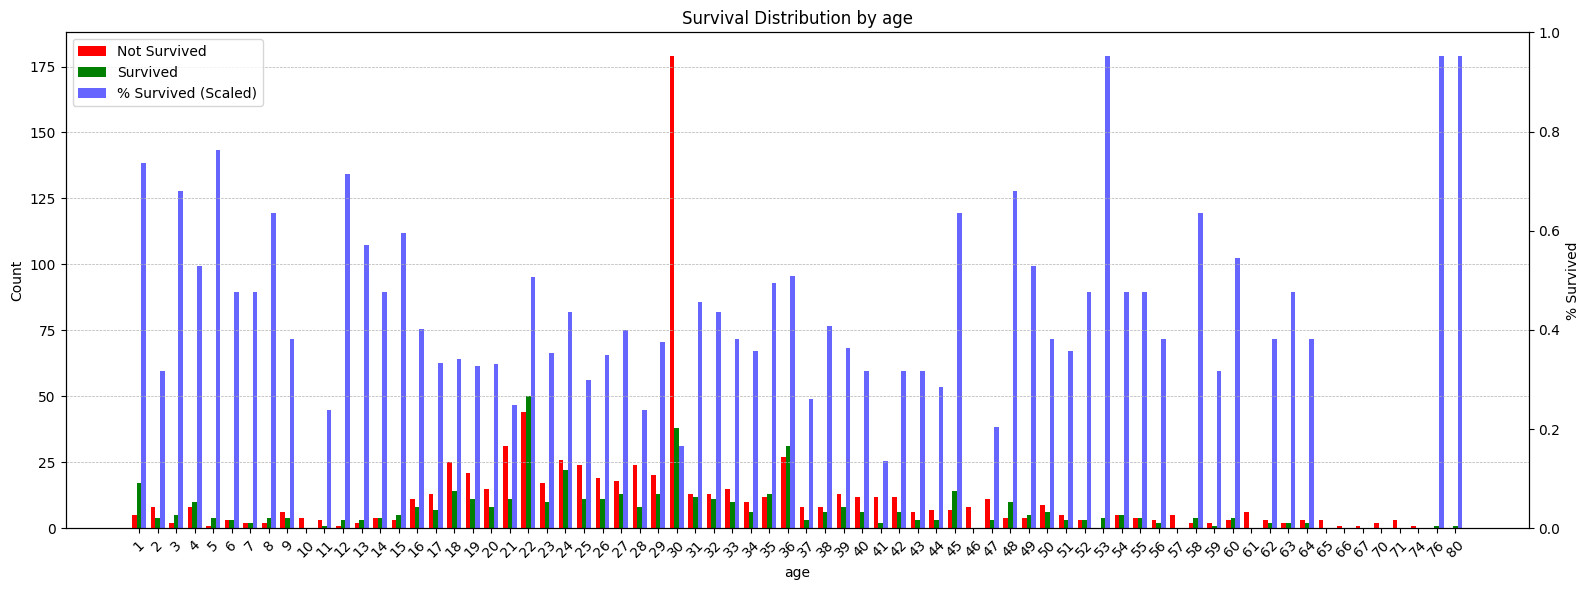

In [27]:
plot_survival_distribution(df, 'age')

Ze względu na nieliniowy charakter rozkładu, dobre pogrupowanie względem wieku powinno poprawić jakość modelu

In [28]:
def age_group(age):
    if age < 9:
        return 0
    elif age < 16:
        return 1
    elif age < 23:
        return 2
    elif age < 45:
        return 3
    else:
        return 4

df['age_group'] = df['age'].apply(age_group)

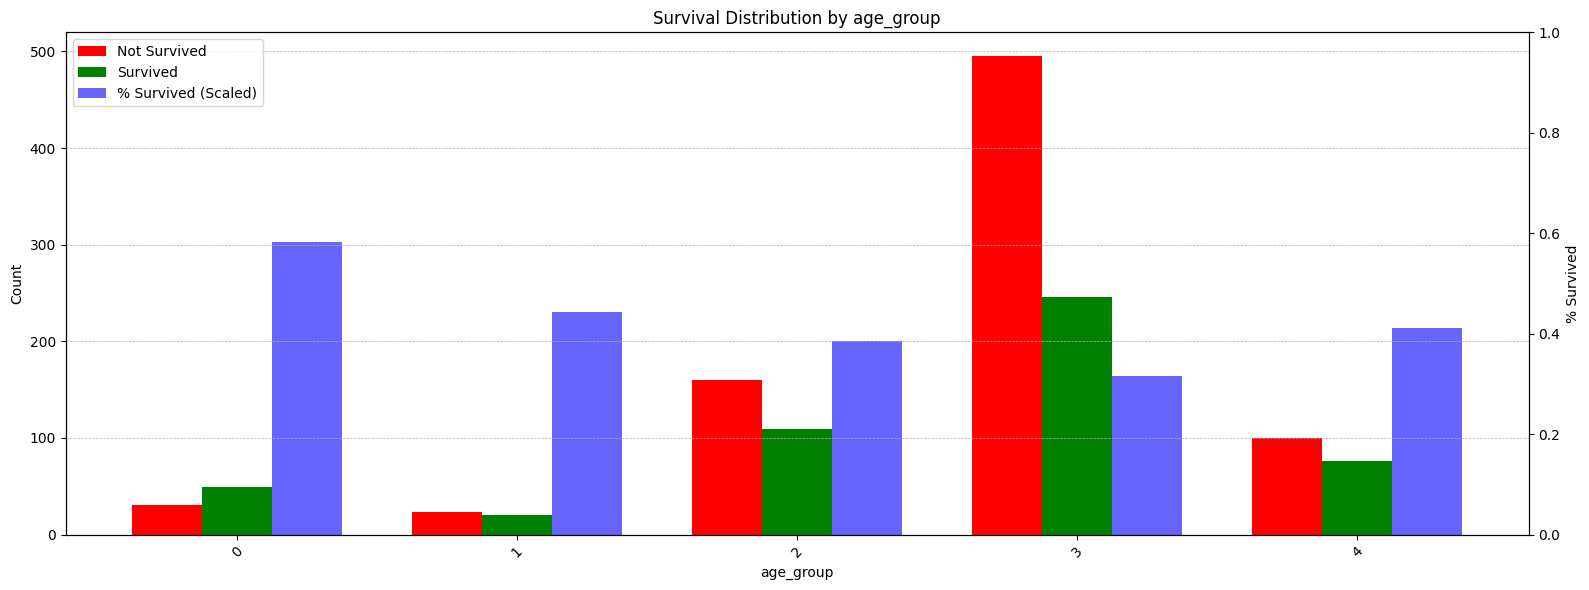

In [29]:
plot_survival_distribution(df, 'age_group')

Uzupełnienie kolumny *embarked*

In [30]:
most_frequent_value = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(most_frequent_value)

Utworzenie kolumny *family_size* oraz usunięcie kolumn składowych

In [31]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df.drop(columns=['sibsp', 'parch'], axis=1, inplace=True)

In [32]:
df['family_size'].value_counts()

family_size
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

In [33]:
df['family_size'].clip(lower=0, upper=5, inplace=True)

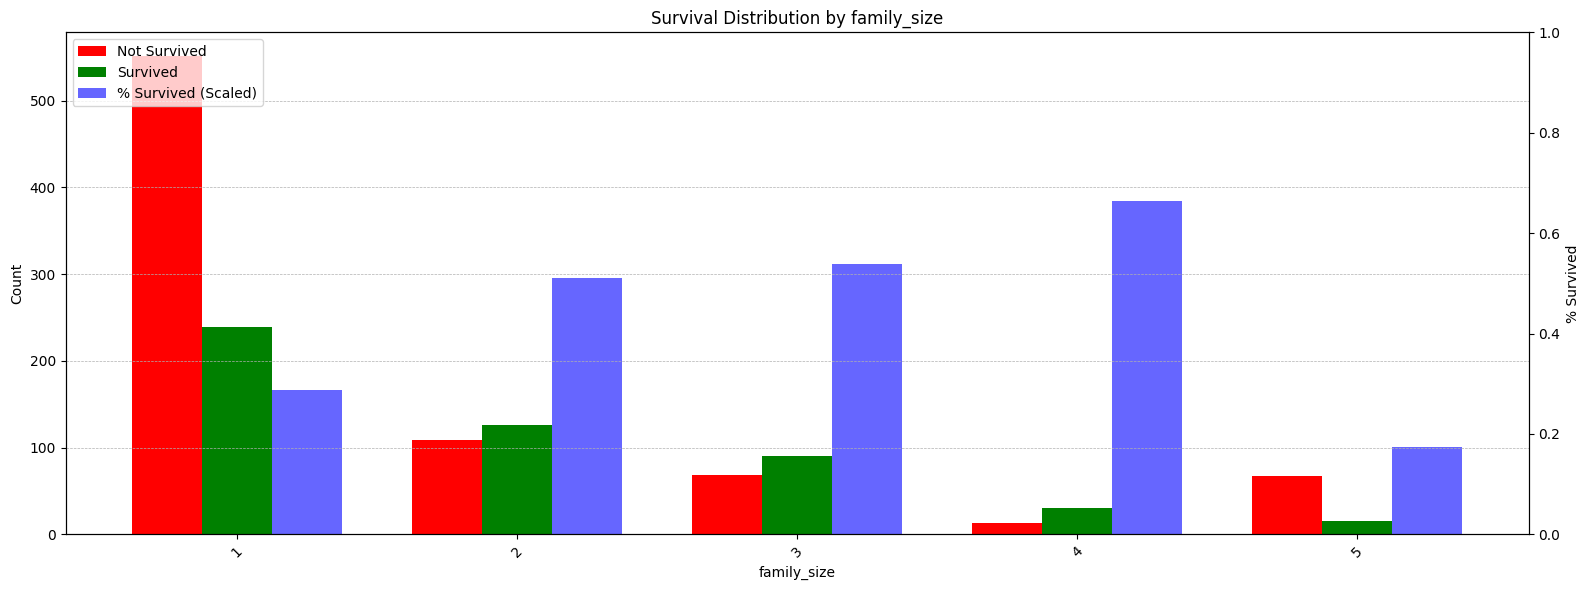

In [34]:
plot_survival_distribution(df, 'family_size')

Pozostała kolumna *fare* - uzupełnienie brakujących wartości oraz pogrupowanie. Zakładamy próbę modelu z opłatami również w postaci zmiennej kategorycznej

In [35]:
fare_mean = df.groupby(['sex', 'title'])['fare'].transform('mean')
df['fare'] = df['fare'].fillna(fare_mean)

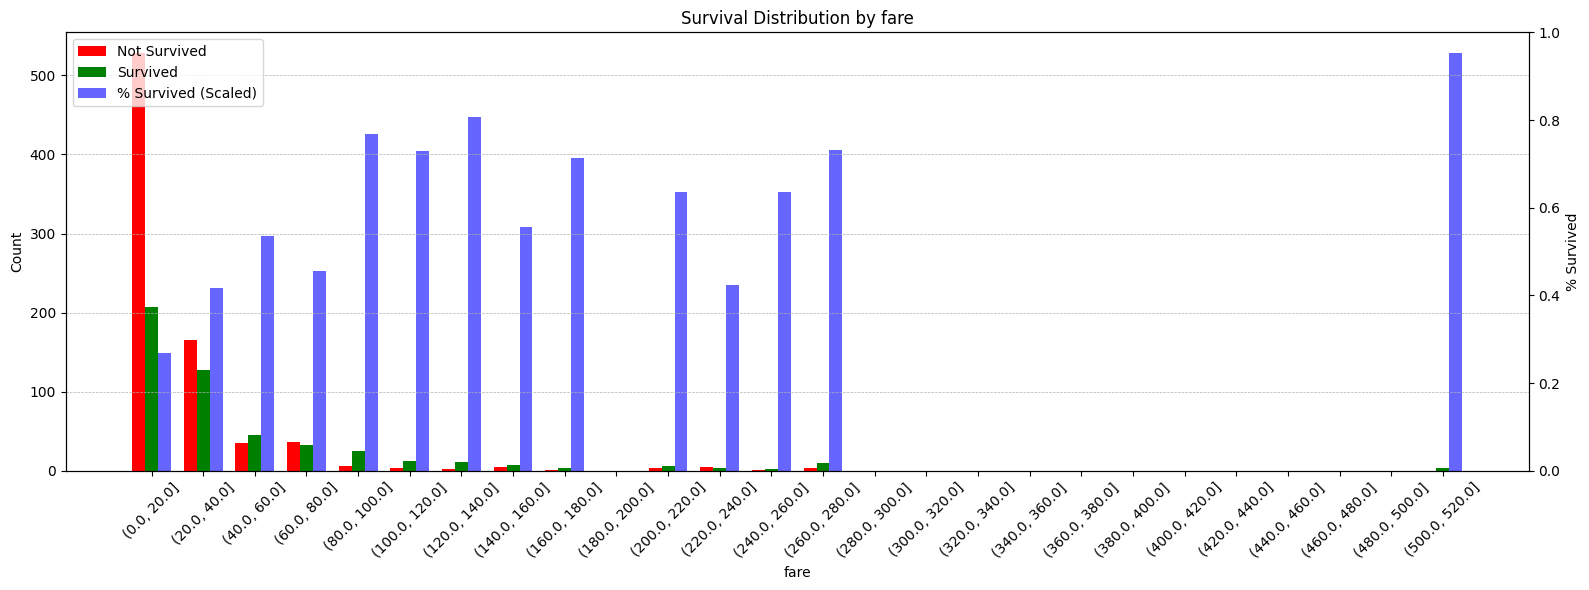

In [36]:
plot_survival_distribution(df, 'fare', bin_size=20)

Fare zostaje przycięte do 100- wartości powyżej jest niewiele, a ich przeżywalność jest porównywalna do zakresu 80-100

In [37]:
df['fare'].clip(lower=0, upper=100, inplace=True)

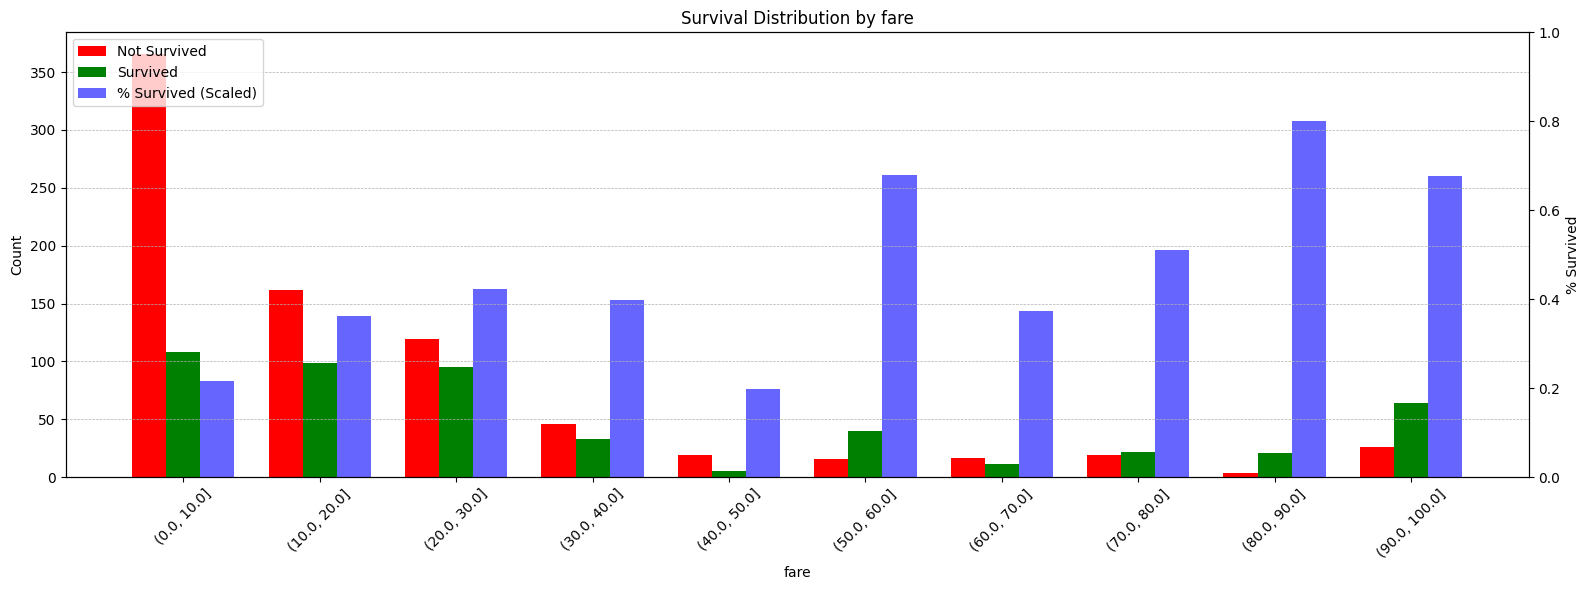

In [38]:
plot_survival_distribution(df, 'fare', bin_size=10)

Podział tak, aby każda grupa miała mniej więcej podobną liczbę ludzi

In [39]:
def group_fare(val):
    if val < 20:
        return 0
    if val < 50:
        return 1
    else:
        return 2

df['fare_group'] = df['fare'].apply(group_fare)

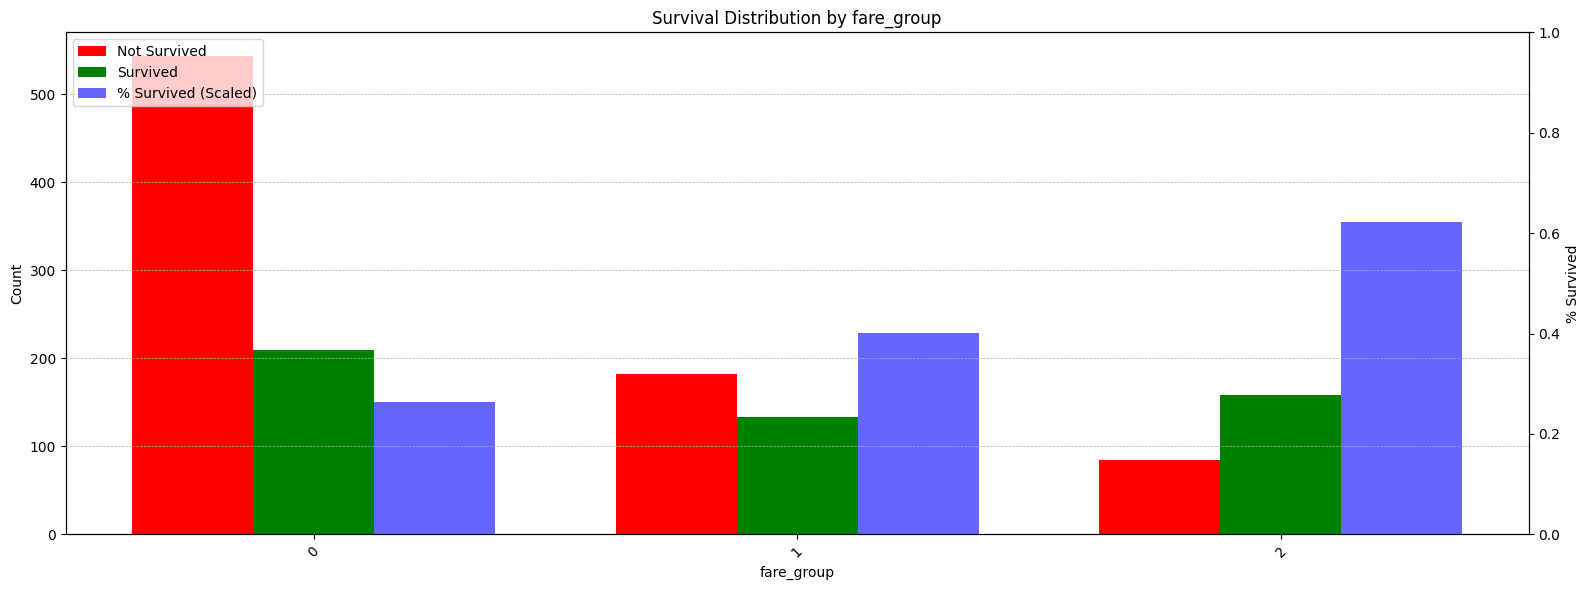

In [40]:
plot_survival_distribution(df, 'fare_group')

Usunięcie niepotrzebnych kolumn. *Boat* i *body* usunięte ponieważ powodują wyciek danych

In [41]:
df.drop(columns=['name'], axis=1, inplace=True)
df.drop(columns=['ticket'], axis=1, inplace=True)
df.drop(columns=['body'], axis=1, inplace=True)
df.drop(columns=['boat'], axis=1, inplace=True)
df.drop(columns=['cabin'], axis=1, inplace=True)
df.drop(columns=['home_dest'], axis=1, inplace=True)
df.head()

,pclass,survived,sex,age,fare,embarked,title,age_group,family_size,fare_group
0,1,1,female,29,100.0,S,Miss,3,1,2
1,1,1,male,1,100.0,S,Master,0,4,2
2,1,0,female,2,100.0,S,Miss,0,4,2
3,1,0,male,30,100.0,S,Mr,3,4,2
4,1,0,female,25,100.0,S,Mrs,3,4,2


## 3 Edycja metadanych



Edycja metadanych będzie znikoma. Finalnie nie wszystkie z podanych atrybutów mogą zostać użyte:

**pclass** - dana numeryczna. Im lepsza klasa tym większa szansa na przeżycie

**survived** - rodzaj danej będzie miał znikomy (o ile jakikolwiek) wpływ, ponieważ wartości są 0 lub 1.

**sex** - to samo co powyżej. Trzeba jednak będzie zmapować kolumnę na wartości 0-1 albo zrobić *one label encoding*

**age** - dana numeryczna. Zakładamy zjawisko *kobiety i dzieci przodem*

**age_group** - dana numeryczna

**fare** - dana numeryczna, zakładamy droższy bilet -> lepsza klasa -> lepszy dostęp do łodzi ratunkowych

**fare_group** - być może najtańsze bilety są dla dzieci (ponownie możliwość zjawiska kobie i dzieci przodem)

**embarked** - dana kategoryczna

**boat** - to samo co w *survived*

**title** - dana kategoryczna

**family_size** - dana numeryczna

In [42]:
df['survived'] = df['survived'].astype(bool)
df['sex'] = df['sex'].map({'male': False, 'female': True})

## 4 Normalizacja danych numerycznych

Tutaj następuje dobór i ostateczne przygotowanie danych treningowych. Dobrane kolumny są wynikiem ręcznych prób dobrania odpowiednich danych wejściowych

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [58]:
df.head()

,pclass,survived,sex,age,fare,embarked,title,age_group,family_size,fare_group
0,1,True,True,29,100.0,S,Miss,3,1,2
1,1,True,False,1,100.0,S,Master,0,4,2
2,1,False,True,2,100.0,S,Miss,0,4,2
3,1,False,False,30,100.0,S,Mr,3,4,2
4,1,False,True,25,100.0,S,Mrs,3,4,2


In [209]:
df_transformed = df.copy()
df_transformed = df.drop(columns=['age_group', 'fare_group'], axis=1)

# categorical_columns = ['embarked', 'title', 'age_group', 'fare_group']
categorical_columns = ['embarked', 'title']
df_transformed = pd.get_dummies(df_transformed, columns=categorical_columns, drop_first=False)
df_transformed.head()


,pclass,survived,sex,age,fare,family_size,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,1,True,True,29,100.0,1,False,False,True,False,True,False,False
1,1,True,False,1,100.0,4,False,False,True,True,False,False,False
2,1,False,True,2,100.0,4,False,False,True,False,True,False,False
3,1,False,False,30,100.0,4,False,False,True,False,False,True,False
4,1,False,True,25,100.0,4,False,False,True,False,False,False,True


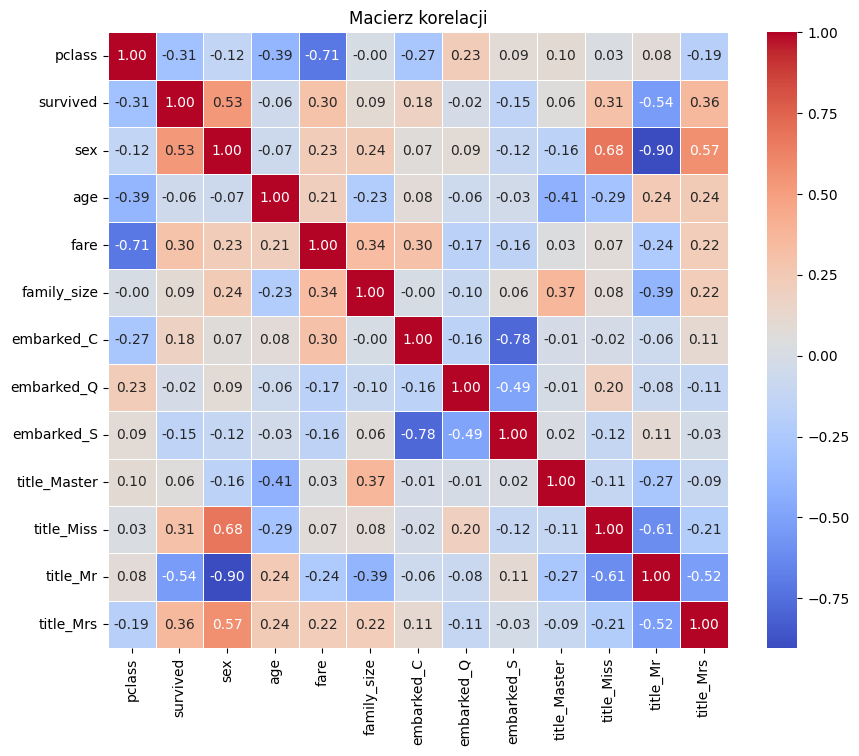

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_transformed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_transformed.drop(columns=['survived', 'age', 'fare', 'family_size'])
# X = df_transformed[['pclass', 'title_Miss', 'title_Mr', 'title_Mrs', 'embarked_Q', 'embarked_S']]
y = df_transformed['survived']
X_scaled = scaler.fit_transform(X)

X_train, X_val_test, y_train, y_val_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=df_transformed['sex'])

## 6 Wybór algorytmu

Na podstawie ręcznego dobierania danych przetestowane zostaną dwa algorytmy- *RandomForestClassfier* oraz *SupportVectorClassfier*

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc, 
                             precision_score, recall_score, f1_score, accuracy_score)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC

def get_cv_score(X, y, model):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return cv_scores.mean()

In [212]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=60)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val_test)
y_pred_prob = rf_model.predict_proba(X_val_test)[:, 1]


print("Raport klasyfikacji:\n", classification_report(y_val_test, y_pred))

cv_scores = get_cv_score( X_train, y_train, rf_model)
print(f'Średnia dokładność walidacji krzyżowej: {cv_scores:.3f}')

cm = confusion_matrix(y_val_test, y_pred)
print("Macierz konfuzji:\n", cm)

accuracy = accuracy_score(y_val_test, y_pred)
print(f"Dokładność (Accuracy): {accuracy:.3f}")

Raport klasyfikacji:
               precision    recall  f1-score   support

       False       0.80      0.89      0.85       240
        True       0.80      0.66      0.72       153

    accuracy                           0.80       393
   macro avg       0.80      0.78      0.78       393
weighted avg       0.80      0.80      0.80       393

Średnia dokładność walidacji krzyżowej: 0.806
Macierz konfuzji:
 [[214  26]
 [ 52 101]]
Dokładność (Accuracy): 0.802


Czułość (Sensitivity): 0.660
Swoistość (Specificity): 0.892
Dokładność: 0.802
F1-Score: 0.721


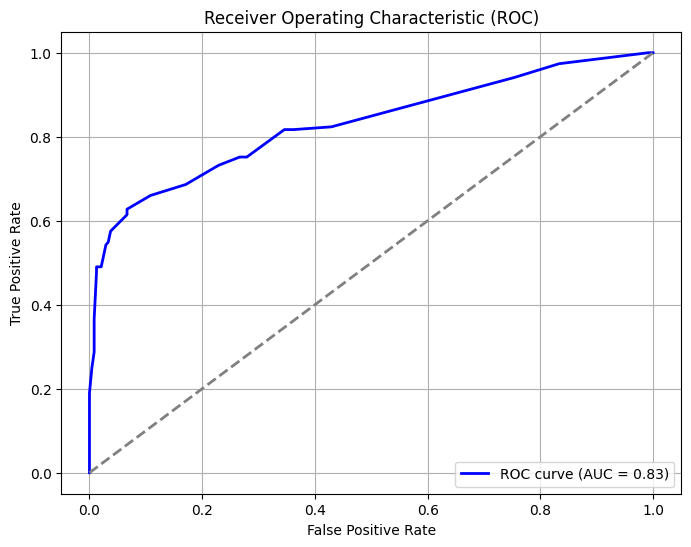

In [213]:
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
accuracy = accuracy_score(y_val_test, y_pred)
f1 = f1_score(y_val_test, y_pred)

print(f"Czułość (Sensitivity): {sensitivity:.3f}")
print(f"Swoistość (Specificity): {specificity:.3f}")
print(f"Dokładność: {accuracy:.3f}")
print(f"F1-Score: {f1:.3f}")

fpr, tpr, thresholds = roc_curve(y_val_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Wynik dla *RandomForestClassfier* jest przyzwoity, osiąga 80,2%. Dla porównania, dla takich samych danych wejściowych model *SupportVectorClassfier*

In [170]:
svm_model = SVC(random_state=42, kernel='poly', C=0.9)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val_test)

print("Raport klasyfikacji:\n", classification_report(y_val_test, y_pred))

cv_scores = get_cv_score( X_train, y_train, rf_model)
print(f'Średnia dokładność: {cv_scores:.3f}')

cm = confusion_matrix(y_val_test, y_pred)
print("Macierz konfuzji:\n", cm)

accuracy = accuracy_score(y_val_test, y_pred)
print(f"Dokładność (Accuracy): {accuracy:.3f}")

Raport klasyfikacji:
               precision    recall  f1-score   support

       False       0.80      0.89      0.85       240
        True       0.80      0.66      0.72       153

    accuracy                           0.80       393
   macro avg       0.80      0.78      0.78       393
weighted avg       0.80      0.80      0.80       393

Średnia dokładność: 0.800
Macierz konfuzji:
 [[214  26]
 [ 52 101]]
Dokładność (Accuracy): 0.802


### Model własnej sieci oraz XGBoost

Budowa własnego modelu okazała się bardziej wymagająca od *RandomForest*, ponieważ należy zadbać o znacznie większą ilość rzeczy (poza danymi wejściowymi, również model, jego budowa, hiperparametry). Poniżej wynik jest zadowalający. Gotowy model jest w okolicach 40-50epoki. Dalsze szkolenie nie ma sensu

In [174]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
    if epoch > 10:
        lr = lr * 1.02
    return lr
lr_scheduler = LearningRateScheduler(scheduler)


df_bruteforce = df.copy()
categorical_columns = ['embarked', 'title', 'age_group', 'fare_group']
columns_to_remove = ['age_group', 'fare']
# columns_to_remove = ['family_size', 'age', 'fare', 'age_group', 'fare_group']
X = df_bruteforce.drop(columns=['survived'] + columns_to_remove)
y = df_bruteforce['survived']

remaining_categorical = list(set(categorical_columns) & set(X.columns))
X = pd.get_dummies(X, columns=remaining_categorical, drop_first=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)


def build_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Dense(16, activation='relu', input_dim=input_dim),
        Dropout(0.25),
        Dense(10, activation='relu'),
        Dropout(0.25),
        Dense(4, activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

cv_accuracies = []
histories = []

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df_transformed['sex'])

model = build_model(input_dim=X.shape[1], learning_rate=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=80, batch_size=32,
    callbacks=[lr_scheduler, early_stop],
    verbose=0
)

_, accuracy = model.evaluate(X_val, y_val, verbose=0)
cv_accuracies.append(accuracy)
histories.append(history)

mean_cv_accuracy = np.mean(cv_accuracies)
print(f"Średnia dokładność walidacji krzyżowej: {mean_cv_accuracy:.4f}")
accuracy = accuracy_score(y_val_test, y_pred)
print(f"Dokładność (Accuracy): {accuracy:.3f}")

c:\Users\Prezes\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Średnia dokładność walidacji krzyżowej: 0.8041
Dokładność (Accuracy): 0.802


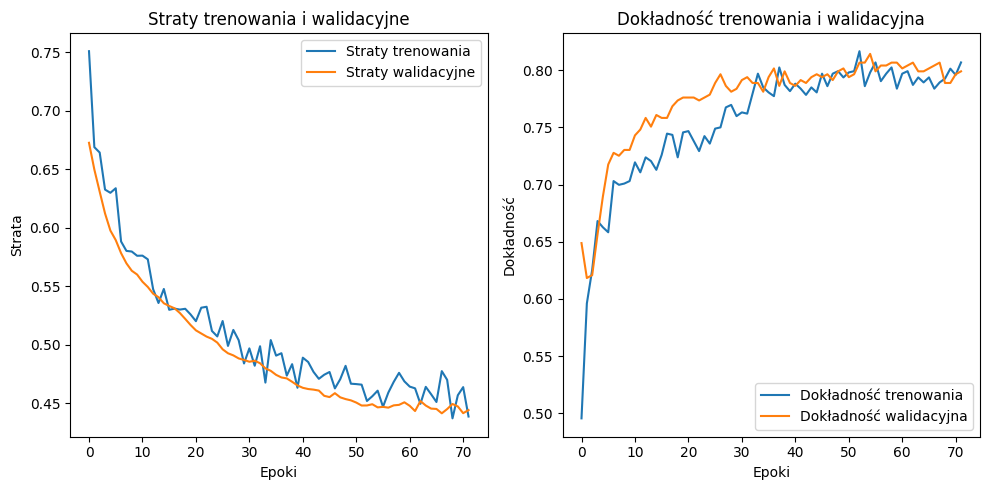

In [175]:
last_history = histories[-1]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(last_history.history['loss'], label='Straty trenowania')
plt.plot(last_history.history['val_loss'], label='Straty walidacyjne')
plt.title('Straty trenowania i walidacyjne')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(last_history.history['accuracy'], label='Dokładność trenowania')
plt.plot(last_history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.title('Dokładność trenowania i walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.tight_layout()
plt.show()

Dla porównania model XGBoost, łatwiejszy do implementacji. Wyniki końcowe są zbliżone do własnoręcznie zbudowanej sieci neuronowej. tutaj jednak, docelowy model otrzymujemy między 30-50 epoce, później straty w zbiorach danych treningowych i walidacyjnych robią się zbyt duże

Średnia dokładność walidacji krzyżowej: 0.8168


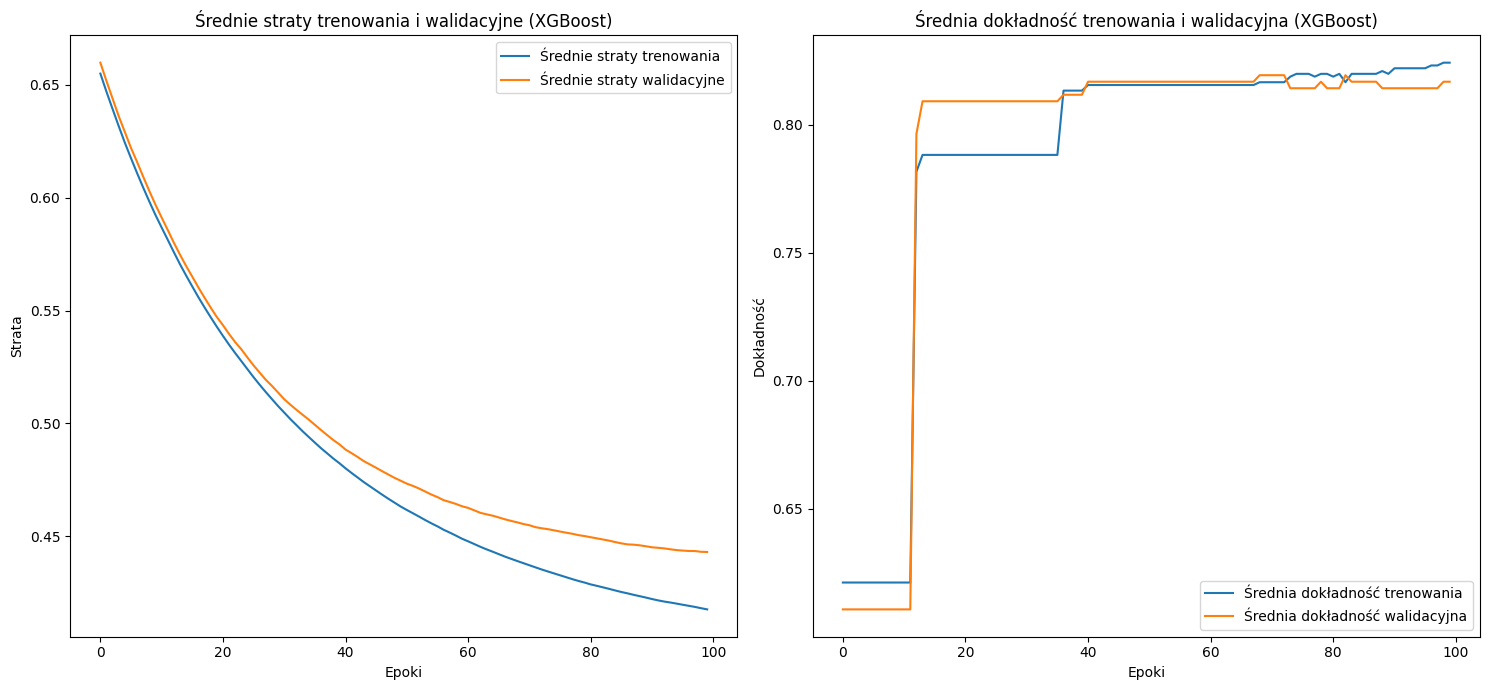

In [176]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

df_bruteforce = df.copy()
categorical_columns = ['embarked', 'title', 'age_group', 'fare_group']

columns_to_remove = ['age_group', 'fare']
X = df_bruteforce.drop(columns=['survived'] + columns_to_remove)
y = df_bruteforce['survived']

remaining_categorical = list(set(categorical_columns) & set(X.columns))
X = pd.get_dummies(X, columns=remaining_categorical, drop_first=True)

scaler = StandardScaler()
X = scaler.fit_transform(X)

xgb_params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.02,    
    'max_depth': 3,           
    'n_estimators': 100,      
    'random_state': 42,       
    'subsample': 0.8,         
    'gamma': 0.1,             
    'min_child_weight': 1,    
    'eval_metric': ['logloss', 'error']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df_transformed['sex'])

model = xgb.XGBClassifier(**xgb_params)

eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=False
)
accuracy = model.score(X_val, y_val)
cv_accuracies.append(accuracy)

results = model.evals_result()
train_losses.append(results['validation_0']['logloss'])
val_losses.append(results['validation_1']['logloss'])

train_accuracies.append(1 - np.array(results['validation_0']['error']))
val_accuracies.append(1 - np.array(results['validation_1']['error']))

mean_cv_accuracy = np.mean(cv_accuracies)
print(f"Średnia dokładność walidacji krzyżowej: {mean_cv_accuracy:.4f}")

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_losses, axis=0), label='Średnie straty trenowania')
plt.plot(np.mean(val_losses, axis=0), label='Średnie straty walidacyjne')
plt.title('Średnie straty trenowania i walidacyjne (XGBoost)')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_accuracies, axis=0), label='Średnia dokładność trenowania')
plt.plot(np.mean(val_accuracies, axis=0), label='Średnia dokładność walidacyjna')
plt.title('Średnia dokładność trenowania i walidacyjna (XGBoost)')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.tight_layout()
plt.show()


### Automatyzacja szukania najlepszego doboru kolumn

Poniżej znajduje się bardziej zautomatyzowana wersja doboru danych wejściowych. Dobór odbywa się na podstawie wielkości *accuracy* dla *DecissionTreeClassfier*. Warto zwrócić uwagę, że potrzebny czas rośnie kilkudziesięciokrotnie. W tym przypadku jest to niecała minuta. Warto mieć jednak na uwadze, że taka metoda nie jest optymalna dla dużych zbiorów danych

Udało uzyskać się dwa wyniki o dokładności powyżej 85% dla zbioru walidacyjnego

In [200]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import itertools

df_bruteforce = df.copy()

categorical_columns = ['embarked', 'title', 'age_group', 'fare_group']

X = df_bruteforce.drop(columns=['survived'])
y = df_bruteforce['survived']

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

accuracy = accuracy_score(y_val_test, y_pred)
print(f"Dokładność (Accuracy): {accuracy:.3f}")

best_score = accuracy
best_columns_to_remove = []

for i in range(1, 8):
    for cols_to_remove in itertools.combinations(X.columns, i):
        X_temp = X.drop(columns=list(cols_to_remove))
        
        remaining_categorical = list(set(categorical_columns) & set(X_temp.columns))
        X_temp = pd.get_dummies(X_temp, columns=remaining_categorical, drop_first=True)

        X_train, X_val_test, y_train, y_val_test = train_test_split(X_temp, y, test_size=0.3, random_state=42, stratify=y)
        
        
        rf_model = RandomForestClassifier(random_state=42, n_estimators=60)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_val_test)

        score = rf_model.score(X_val_test, y_val_test)

        accuracy = accuracy_score(y_val_test, y_pred)

        if accuracy > 0.85:
            best_score = accuracy
            best_columns_to_remove = cols_to_remove
            print(f'Usunięcie kolumn {cols_to_remove} poprawiło wynik. Nowa dokładność: {best_score}')
            print(f'Pozostałe kolumny: {X_temp.columns}')
            print("Raport klasyfikacji:\n", classification_report(y_val_test, y_pred))

Dokładność (Accuracy): 0.794
Usunięcie kolumn ('age', 'fare', 'age_group', 'family_size', 'fare_group') poprawiło wynik. Nowa dokładność: 0.8549618320610687
Pozostałe kolumny: Index(['pclass', 'sex', 'title_Miss', 'title_Mr', 'title_Mrs', 'embarked_Q',
       'embarked_S'],
      dtype='object')
Raport klasyfikacji:
               precision    recall  f1-score   support

       False       0.83      0.97      0.89       243
        True       0.93      0.67      0.78       150

    accuracy                           0.85       393
   macro avg       0.88      0.82      0.84       393
weighted avg       0.87      0.85      0.85       393

Usunięcie kolumn ('sex', 'age', 'fare', 'age_group', 'family_size', 'fare_group') poprawiło wynik. Nowa dokładność: 0.8524173027989822
Pozostałe kolumny: Index(['pclass', 'title_Miss', 'title_Mr', 'title_Mrs', 'embarked_Q',
       'embarked_S'],
      dtype='object')
Raport klasyfikacji:
               precision    recall  f1-score   support

       Fa